The task here in this tutorial is to find the diatribution of data. First import all the necessary libraries and then visualise data to show its distribution

In [1]:
# this piece of line helps in importing matplotlib.
!pip install -U matplotlib pandas

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.0)
Requirement already up-to-date: pandas in /usr/local/lib/python3.7/dist-packages (1.2.3)


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
# Loading and Reading the dataset
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)
print(data.head())



             001  002  003  004  005  006  ...  162  163  164  165  166  167
Date                                       ...                              
2019-01-01  1062   33   67   42    0    4  ...   10    2    2    2    0    0
2019-01-02   976   41   72   19    2    0  ...    0    0    0    0    1    3
2019-01-03   956   27   71   28    4    6  ...    6    0    0    3    0    0
2019-01-04   976   30   57   29    0    0  ...    0    0    0    0    0    7
2019-01-05   956   45   65   27    4    1  ...    0    0    0    0    5    2

[5 rows x 167 columns]


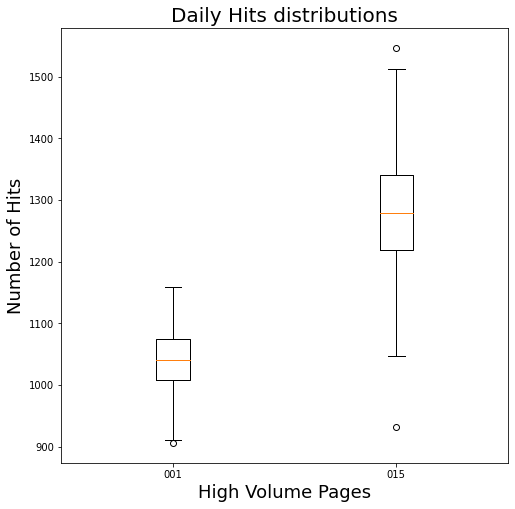

In [4]:
selected = ['001','015']

plt.figure(figsize=(8, 8))
# data[selected].boxplot()
plt.boxplot(data[selected], labels=selected)
plt.xlabel('High Volume Pages', fontsize=18)
plt.ylabel('Number of Hits', fontsize=18)
plt.title('Daily Hits distributions', fontsize=20)
plt.show()

Here , I have selected the two most high value pages which are 001 and 015. I have used box plot to show their distribution. From my findings I can say that page 015 is more distributed but If I talk about the tightly distribution then its is of 001

13 bins


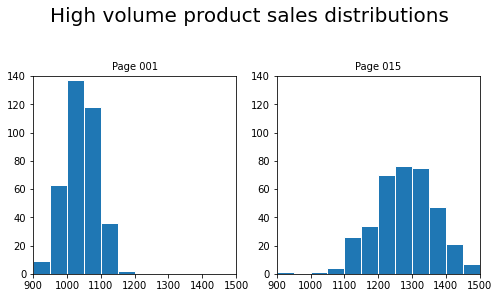

In [11]:
x_min = 900
x_max = 1500
bin_width = 50

selected = ['001', '015']

n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

fig = plt.figure(figsize=(8, 8))
fig.suptitle('High volume product sales distributions', fontsize=20, position=(0.5, 1.0))
counter = 1
for name in selected:
    sub = fig.add_subplot(2, 2, counter)
    sub.hist(data[name], bins, edgecolor='w')
    sub.set_title('Page ' + name, fontsize=10)
    sub.set_xlim(xmin=x_min, xmax=x_max)
    sub.set_ylim(ymin=0, ymax=140)
    counter += 1
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


If I talk about the histogram plotting of the two high volume pages then page 001 has high number of number of daily hits but 015 has more days of number of hits.

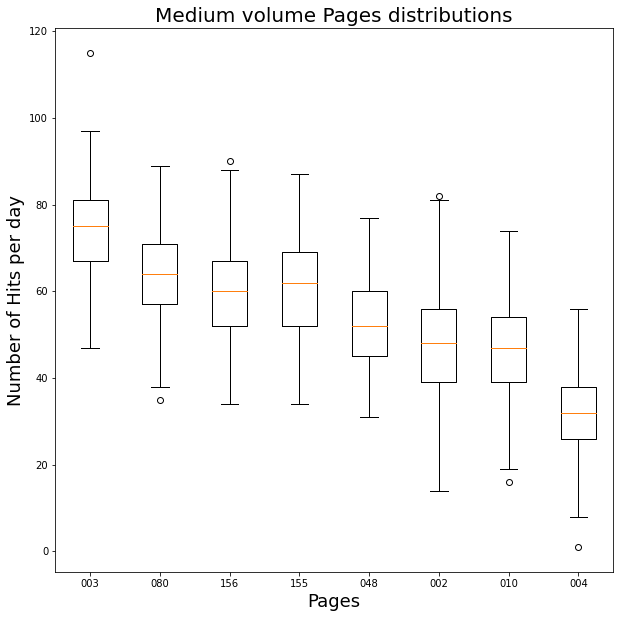

In [12]:
selected = ['003', '080', '156', '155', '048','002','010','004']

plt.figure(figsize=(10, 10))
# data[selected].boxplot()
plt.boxplot(data[selected], labels=selected)
plt.xlabel('Pages', fontsize=18)
plt.ylabel('Number of Hits per day', fontsize=18)
plt.title('Medium volume Pages distributions', fontsize=20)
plt.show()


Yes , the medium volume pages are distributed similarly but as we go down the page hit value decreases.

10 bins


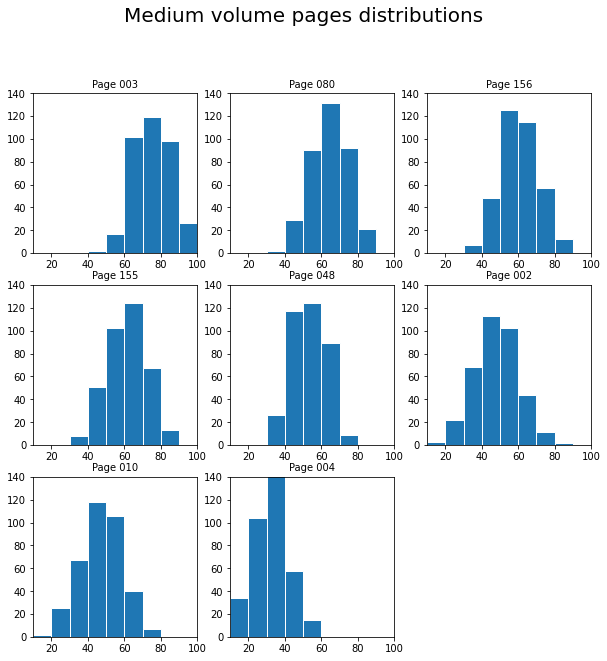

In [13]:
x_min = 10
x_max = 100
bin_width = 10
selected = ['003', '080', '156', '155', '048','002','010','004']

n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Medium volume pages distributions', fontsize=20, position=(0.5, 1.0))
counter = 1
for name in selected:
    sub = fig.add_subplot(3, 3, counter)
    sub.hist(data[name], bins, edgecolor='w')
    sub.set_title('Page ' + name, fontsize=10)
    sub.set_xlim(xmin=x_min, xmax=x_max)
    sub.set_ylim(ymin=0, ymax=140)
    counter += 1
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


Yes , the histogram plotting confirms my findings of box plotting that medium volume pages are evenly distributed.

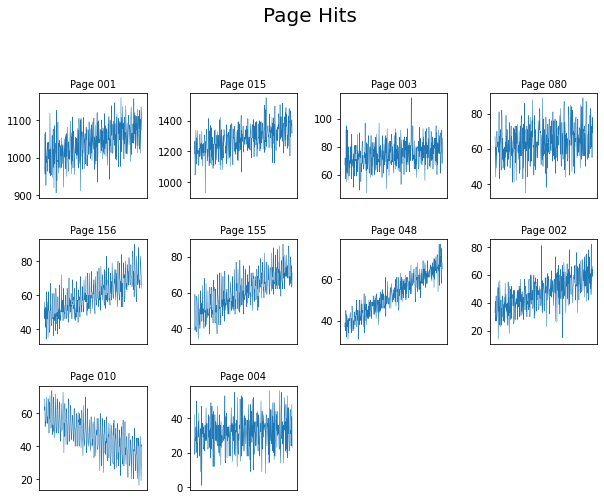

In [14]:
data1 = data[['001','015','003','080','156','155','048','002','010','004']]
counter = 1
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Page Hits', fontsize=20, position=(0.5, 1.0))
for name in data1.columns:
    sub = fig.add_subplot(4,4, counter)
    sub.set_title('Page ' + name, fontsize=10)
    sub.plot(data1.index, data1[name], linewidth=0.5)
    sub.axes.get_xaxis().set_ticks([])  # remove the x ticks
    counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

I can't detect any quarterly seasonlaity by looking ones in the line plots but yes page 048,156,155,010 are possible to show a quarterly seasonality.

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


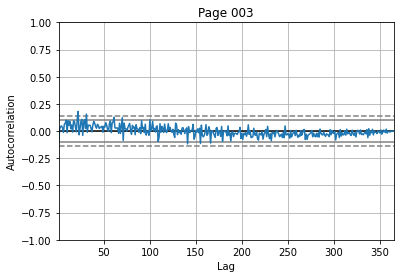

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


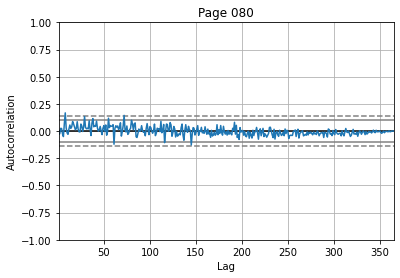

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


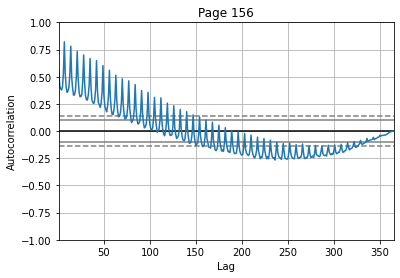

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


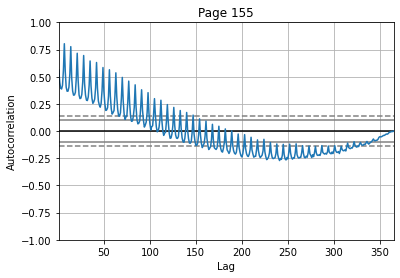

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


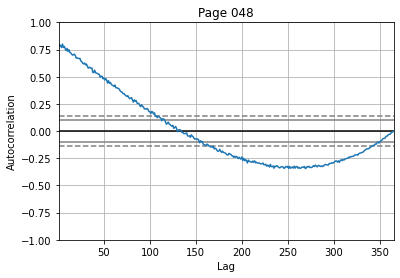

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


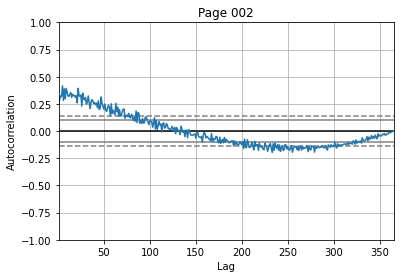

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


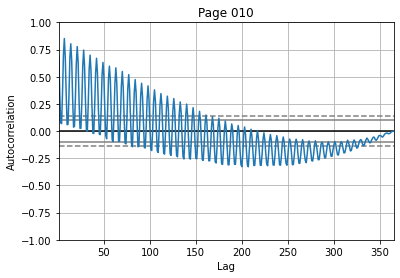

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


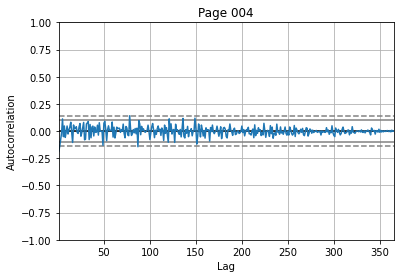

In [15]:
selected = ['003','080','156','155','048','002','010','004']

for name in selected:
    pd.plotting.autocorrelation_plot(data[name])
    #plt.xlim([0, 50]) # uncomment this line to zoom in
    plt.title('Page ' + name)
    plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


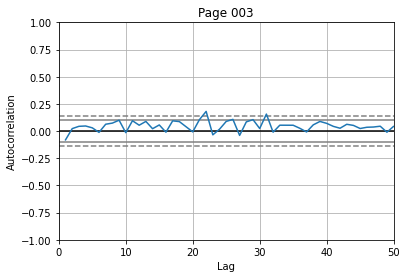

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


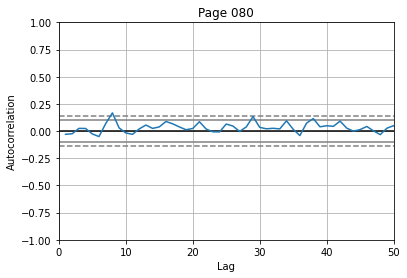

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


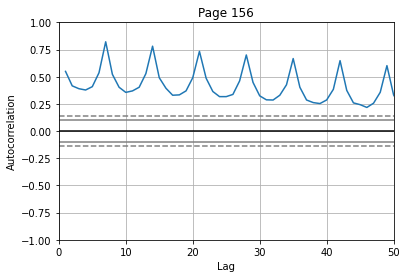

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


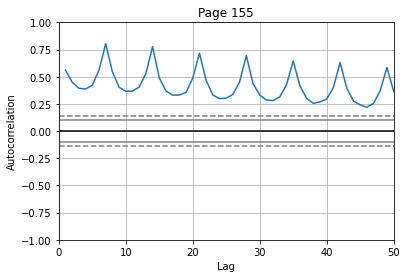

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


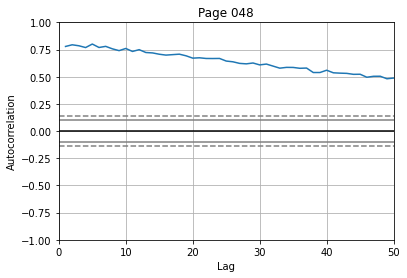

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


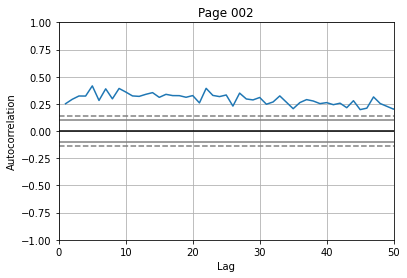

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


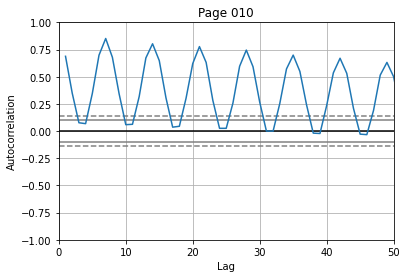

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


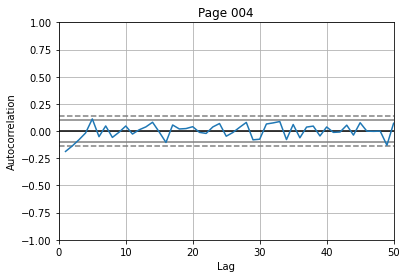

In [16]:
selected = ['003','080','156','155','048','002','010','004']

for name in selected:
    pd.plotting.autocorrelation_plot(data[name])
    plt.xlim([0, 50]) # uncomment this line to zoom in
    plt.title('Page ' + name)
    plt.show()

Yes , the pages are exhibiting weekly seasonality.